<a href="https://colab.research.google.com/github/AzizahBsyrh/DecisionTree_FSD/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama:

*   Nur Azizah Basyirah Syamsuddin (24523238)
*   Fertika Indri Dhamaningrum (24523160)
* Naila Reyhantyas Nurkhalisha (24523050)




Penjelasan:

*   from sklearn.datasets import load_diabetes: Baris ini mengimpor fungsi load_diabetes dari modul sklearn.datasets. Fungsi ini digunakan untuk memuat dataset bawaan (built-in) yang sering digunakan untuk tugas-tugas regresi.

*   import pandas as pd: Baris ini mengimpor pustaka pandas dan memberinya alias pd. Pandas adalah pustaka yang sangat berguna untuk manipulasi dan analisis data, menyediakan struktur data seperti DataFrame.
*   diabetes = load_diabetes(): Baris ini memanggil fungsi load_diabetes() dan menyimpan objek dataset yang dikembalikan ke dalam variabel diabetes. Objek ini berisi data fitur, variabel target, dan deskripsi dataset.
*   diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names): Baris ini membuat pandas DataFrame baru bernama diabetes_df. Data untuk DataFrame ini diambil dari data fitur (diabetes.data), dan nama kolomnya diambil dari nama fitur (diabetes.feature_names).
*   diabetes_df['target'] = diabetes.target: Baris ini menambahkan kolom baru bernama 'target' ke dalam DataFrame diabetes_df. Nilai-nilai di kolom ini diambil dari array diabetes.target, yang berisi ukuran kuantitatif perkembangan penyakit untuk setiap pasien.
*   display(diabetes_df.head()): Baris ini menggunakan fungsi display()
(umum di lingkungan seperti Colab dan Jupyter notebook) untuk menampilkan lima baris pertama dari DataFrame diabetes_df. Ini adalah cara cepat untuk melihat struktur dan isi data yang sudah Anda muat dan proses.
Jadi, sel kode ini bertanggung jawab untuk memuat dataset dan menyiapkannya sebagai pandas DataFrame, yang merupakan format standar untuk analisis data dan machine learning di Python.



In [30]:
from sklearn.datasets import load_diabetes
import pandas as pd

# Load the diabetes dataset
diabetes = load_diabetes()

# Create a pandas DataFrame from the data and target
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target

# Display the first few rows of the DataFrame
display(diabetes_df.head())

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Penjelasan:

*   import numpy as np: Baris ini mengimpor pustaka numpy, yang merupakan pustaka fundamental untuk komputasi numerik di Python. Alias np adalah konvensi umum untuk merujuk ke numpy.
*   from sklearn.metrics import confusion_matrix, accuracy_score, classification_report: Baris ini mengimpor tiga fungsi spesifik dari modul sklearn.metrics dalam pustaka scikit-learn. Fungsi-fungsi ini umumnya digunakan untuk mengevaluasi kinerja model klasifikasi:
confusion_matrix: Membuat matriks kebingungan.
accuracy_score: Menghitung akurasi model.
classification_report: Menghasilkan laporan teks yang menunjukkan metrik klasifikasi utama seperti presisi, recall, dan f1-score.
*   from sklearn.model_selection import train_test_split: Baris ini mengimpor fungsi train_test_split dari modul sklearn.model_selection. Fungsi ini digunakan untuk membagi dataset menjadi subset pelatihan dan pengujian secara acak.
*   from sklearn.tree import DecisionTreeClassifier: Baris ini mengimpor kelas DecisionTreeClassifier dari modul sklearn.tree. Kelas ini digunakan untuk membuat model pohon keputusan untuk tugas klasifikasi.
*   import matplotlib.pyplot as plt: Baris ini mengimpor modul pyplot dari pustaka matplotlib, yang merupakan pustaka populer untuk membuat plot dan visualisasi statis, interaktif, dan animasi di Python. Alias plt adalah konvensi umum untuk merujuk ke pyplot.

In [31]:
# Importing the required packages
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

Penjelasan:
*  def splitdataset(dataframe): Baris ini mendefinisikan sebuah fungsi bernama splitdataset yang menerima satu argumen, yaitu dataframe. dataframe ini diharapkan adalah pandas DataFrame yang berisi data Anda.
*   X = dataframe[['age', 'sex', 'bmi', 'bp']]: Baris ini membuat DataFrame baru bernama X yang hanya berisi kolom-kolom 'age', 'sex', 'bmi', dan 'bp' dari dataframe asli. Kolom-kolom ini dianggap sebagai fitur atau variabel independen yang akan digunakan untuk melatih model.
*   Y = dataframe['target']: Baris ini membuat Series baru bernama Y yang berisi data dari kolom 'target' dari dataframe asli. Kolom ini dianggap sebagai variabel target atau variabel dependen yang ingin diprediksi oleh model.
*   X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=100): Baris ini menggunakan fungsi train_test_split dari scikit-learn untuk membagi data fitur (X) dan variabel target (Y) menjadi empat subset:
X_train: Fitur untuk data pelatihan.
X_test: Fitur untuk data pengujian.
y_train: Variabel target untuk data pelatihan.
y_test: Variabel target untuk data pengujian.
test_size=0.3: Menentukan bahwa 30% dari data akan dialokasikan untuk set pengujian, dan sisanya (70%) untuk set pelatihan.
random_state=100: Mengatur seed untuk proses pengacakan saat membagi data. Ini penting agar hasil pembagian dataset selalu sama setiap kali kode dijalankan, sehingga hasilnya dapat direproduksi.
return X, Y, X_train, X_test, y_train, y_test: Baris ini mengembalikan keenam variabel yang telah dibuat oleh fungsi: X, Y, X_train, X_test, y_train, dan y_test.

In [32]:
# Function to split the dataset into features and target variables
def splitdataset(dataframe):
    # Select only the first 4 feature columns and the target column
    X = dataframe[['age', 'sex', 'bmi', 'bp']]
    Y = dataframe['target']

    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=0.3, random_state=100)

    return X, Y, X_train, X_test, y_train, y_test

Penjelasan:


*   from sklearn.tree import DecisionTreeRegressor: Baris ini mengimpor kelas DecisionTreeRegressor dari modul sklearn.tree. Kelas ini digunakan untuk membuat model pohon keputusan khusus untuk tugas regresi (memprediksi nilai kontinu).
*   def train_using_gini(X_train, X_test, y_train):: Baris ini mendefinisikan sebuah fungsi bernama train_using_gini yang menerima tiga argumen: X_train (fitur data pelatihan), X_test (fitur data pengujian), dan y_train (variabel target data pelatihan).
*   reg_gini = DecisionTreeRegressor(random_state=100, max_depth=3, min_samples_leaf=5): Baris ini membuat sebuah instance (objek) dari kelas DecisionTreeRegressor dan menyimpannya dalam variabel reg_gini. Parameter yang digunakan adalah:
random_state=100: Mengatur seed untuk pengacakan, memastikan hasil yang sama setiap kali kode dijalankan.
max_depth=3: Membatasi kedalaman maksimum pohon keputusan hingga 3 tingkat. Ini membantu mencegah overfitting.
min_samples_leaf=5: Menetapkan jumlah minimum sampel yang harus ada di setiap node daun. Ini juga membantu mengendalikan ukuran pohon dan mencegah overfitting.
*   reg_gini.fit(X_train, y_train): Baris ini melatih model DecisionTreeRegressor (reg_gini) menggunakan data pelatihan. .fit() adalah metode yang digunakan untuk melatih model dengan data fitur pelatihan (X_train) dan variabel target pelatihan (y_train).
*  return reg_gini: Baris ini mengembalikan objek regressor yang sudah dilatih (reg_gini) dari fungsi.

Jadi, fungsi ini bertanggung jawab untuk membuat dan melatih model Decision Tree Regressor dengan parameter tertentu menggunakan data pelatihan yang disediakan.


In [33]:
from sklearn.tree import DecisionTreeRegressor
# Function to train the model using Gini (though Gini is for classification, we'll use it as a placeholder name)
def train_using_gini(X_train, X_test, y_train):

    # Creating the regressor object
    reg_gini = DecisionTreeRegressor(random_state=100, max_depth=3, min_samples_leaf=5)

    # Performing training
    reg_gini.fit(X_train, y_train)
    return reg_gini

Penjelasan

* `from sklearn.tree import DecisionTreeRegressor`: Baris ini mengimpor kelas `DecisionTreeRegressor` dari modul `sklearn.tree`. Kelas ini digunakan untuk membuat model pohon keputusan khusus untuk tugas regresi (memprediksi nilai kontinu).
* `def train_using_entropy(X_train, X_test, y_train):`: Baris ini mendefinisikan sebuah fungsi bernama `train_using_entropy` yang menerima tiga argumen: `X_train` (fitur data pelatihan), `X_test` (fitur data pengujian), dan `y_train` (variabel target data pelatihan).
* `reg_entropy = DecisionTreeRegressor(random_state=100, max_depth=3, min_samples_leaf=5)`: Baris ini membuat sebuah instance (objek) dari kelas `DecisionTreeRegressor` dan menyimpannya dalam variabel `reg_entropy`. Parameter yang digunakan adalah:
    * `random_state=100`: Mengatur seed untuk pengacakan, memastikan hasil yang sama setiap kali kode dijalankan.
    * `max_depth=3`: Membatasi kedalaman maksimum pohon keputusan hingga 3 tingkat. Ini membantu mencegah overfitting.
    * `min_samples_leaf=5`: Menetapkan jumlah minimum sampel yang harus ada di setiap node daun. Ini juga membantu mengendalikan ukuran pohon dan mencegah overfitting.
* `reg_entropy.fit(X_train, y_train)`: Baris ini melatih model `DecisionTreeRegressor` (`reg_entropy`) menggunakan data pelatihan. `.fit()` adalah metode yang digunakan untuk melatih model dengan data fitur pelatihan (`X_train`) dan variabel target pelatihan (`y_train`).
* `return reg_entropy`: Baris ini mengembalikan objek regressor yang sudah dilatih (`reg_entropy`) dari fungsi.

Secara keseluruhan, fungsi ini bertanggung jawab untuk membuat dan melatih model Decision Tree Regressor dengan parameter tertentu menggunakan data pelatihan yang disediakan, serupa dengan fungsi `train_using_gini` tetapi menggunakan nama yang berbeda.

In [34]:
from sklearn.tree import DecisionTreeRegressor
# Function to train the model using Entropy (though Entropy is for classification, we'll use it as a placeholder name)
def train_using_entropy(X_train, X_test, y_train):

    # Decision tree with entropy
    reg_entropy = DecisionTreeRegressor(
        random_state=100,
        max_depth=3, min_samples_leaf=5)

    # Performing training
    reg_entropy.fit(X_train, y_train)
    return reg_entropy

Penjelasan:

* `def prediction(X_test, clf_object):`: Baris ini mendefinisikan sebuah fungsi bernama `prediction` yang menerima dua argumen: `X_test` (fitur data pengujian) dan `clf_object` (objek model yang sudah dilatih).
* `y_pred = clf_object.predict(X_test)`: Baris ini menggunakan objek model yang sudah dilatih (`clf_object`) untuk membuat prediksi pada data pengujian (`X_test`). Hasil prediksi disimpan dalam variabel `y_pred`.
* `print("Predicted values:")`: Baris ini mencetak teks "Predicted values:" ke konsol.
* `print(y_pred)`: Baris ini mencetak nilai-nilai prediksi yang disimpan dalam variabel `y_pred` ke konsol.
* `return y_pred`: Baris ini mengembalikan nilai-nilai prediksi (`y_pred`) dari fungsi.
* `def cal_accuracy(y_test, y_pred):`: Baris ini mendefinisikan sebuah fungsi bernama `cal_accuracy` yang menerima dua argumen: `y_test` (variabel target data pengujian yang sebenarnya) dan `y_pred` (variabel target hasil prediksi).
* `print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))`: Baris ini mencoba mencetak matriks kebingungan. Matriks kebingungan digunakan untuk mengevaluasi model klasifikasi dengan membandingkan nilai target sebenarnya (`y_test`) dengan nilai prediksi (`y_pred`).
* `print("Accuracy : ", accuracy_score(y_test, y_pred)*100)`: Baris ini mencoba mencetak akurasi model. Akurasi adalah metrik evaluasi yang umum untuk model klasifikasi.
* `print("Report : ", classification_report(y_test, y_pred))`: Baris ini mencoba mencetak laporan klasifikasi yang mencakup presisi, recall, dan f1-score. Ini juga merupakan metrik evaluasi untuk model klasifikasi.

In [35]:
# Function to make predictions
def prediction(X_test, clf_object):
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

# Placeholder function for cal_accuracy
def cal_accuracy(y_test, y_pred):
    print("Confusion Matrix: ",
          confusion_matrix(y_test, y_pred))
    print("Accuracy : ",
          accuracy_score(y_test, y_pred)*100)
    print("Report : ",
          classification_report(y_test, y_pred))

Penjelasan:

* `from sklearn.tree import plot_tree`: Baris ini mengimpor fungsi `plot_tree` dari modul `sklearn.tree` dalam pustaka scikit-learn. Fungsi ini digunakan untuk memvisualisasikan struktur pohon keputusan.
* `def plot_decision_tree(clf_object, feature_names, class_names):`: Baris ini mendefinisikan sebuah fungsi bernama `plot_decision_tree` yang menerima tiga argumen: `clf_object` (objek model pohon keputusan yang sudah dilatih), `feature_names` (daftar nama fitur), dan `class_names` (daftar nama kelas target).Fungsi `plot_tree` akan menampilkan nilai prediksi di node daun untuk regresi.
* `plt.figure(figsize=(15, 10))`: Baris ini membuat sebuah objek figure baru untuk plot dengan ukuran 15 inci lebarnya dan 10 inci tingginya. Ini membantu membuat visualisasi pohon lebih mudah dibaca, terutama untuk pohon yang besar.
* `plot_tree(clf_object, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)`: Baris ini memanggil fungsi `plot_tree` untuk menggambar pohon keputusan:
    * `clf_object`: Model pohon keputusan yang akan digambar.
    * `filled=True`: Mengisi node pohon dengan warna untuk menunjukkan kelas mayoritas (untuk klasifikasi) atau nilai (untuk regresi).
    * `feature_names=feature_names`: Memberikan nama untuk setiap fitur, yang akan ditampilkan di node pohon.
    * `class_names=class_names`: Memberikan nama untuk setiap kelas target (lebih relevan untuk klasifikasi).
    * `rounded=True`: Membuat kotak node pohon memiliki sudut membulat.
* `plt.show()`: Baris ini menampilkan plot pohon keputusan yang sudah dibuat.

In [36]:
from sklearn import tree
# Function to plot the decision tree
def plot_decision_tree(clf_object, feature_names, class_names):
    plt.figure(figsize=(15, 10))
    plot_tree(clf_object, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
    plt.show()

Penjelasan:

* `if __name__ == "__main__":`: Ini adalah blok standar Python yang memastikan kode di dalamnya hanya dijalankan saat skrip dieksekusi langsung (bukan saat diimpor sebagai modul).
* `data = diabetes_df`: Baris ini menetapkan variabel `data` untuk merujuk pada DataFrame `diabetes_df` yang sudah dimuat sebelumnya.
* `X, Y, X_train, X_test, y_train, y_test = splitdataset(data)`: Baris ini memanggil fungsi `splitdataset` dengan `data` sebagai argumennya. Fungsi ini membagi data menjadi fitur (`X`), target (`Y`), serta set pelatihan (`X_train`, `y_train`) dan pengujian (`X_test`, `y_test`). Hasil pembagian ini kemudian disimpan dalam variabel-variabel yang sesuai.
* `feature_names = ['age', 'sex', 'bmi', 'bp']`: Baris ini membuat daftar string yang berisi nama-nama fitur yang digunakan dalam model. Ini akan digunakan untuk label pada visualisasi pohon.
* `from sklearn.tree import plot_tree # Ensure plot_tree is imported`: Baris ini mengimpor kembali fungsi `plot_tree` dari `sklearn.tree`. Meskipun sudah diimpor di sel lain, mengimpornya di sini memastikan ketersediaannya dalam blok kode ini.
* `plt.figure(figsize=(15, 10))`: Baris ini membuat objek figure baru untuk plot dengan ukuran 15 inci lebarnya dan 10 inci tingginya, mempersiapkan ruang untuk visualisasi pohon.
* `plot_tree(reg_gini, filled=True, feature_names=feature_names, rounded=True, impurity=True)`: Baris ini adalah inti dari visualisasi. Memanggil fungsi `plot_tree` untuk menggambar pohon `reg_gini` dengan beberapa opsi:
    * `filled=True`: Mengisi node pohon dengan warna berdasarkan nilai impurity.
    * `feature_names=feature_names`: Menggunakan nama fitur yang ditentukan sebelumnya untuk melabeli node.
    * `rounded=True`: Membuat sudut node pohon membulat.
    * `impurity=True`: Menampilkan nilai impurity di setiap node (untuk regresi, ini biasanya Mean Squared Error).
* `plt.title("Decision Tree Regressor (Gini)")`: Baris ini menambahkan judul "Decision Tree Regressor (Gini)" pada plot.
* `plt.show()`: Baris ini menampilkan plot pohon keputusan yang sudah dibuat.

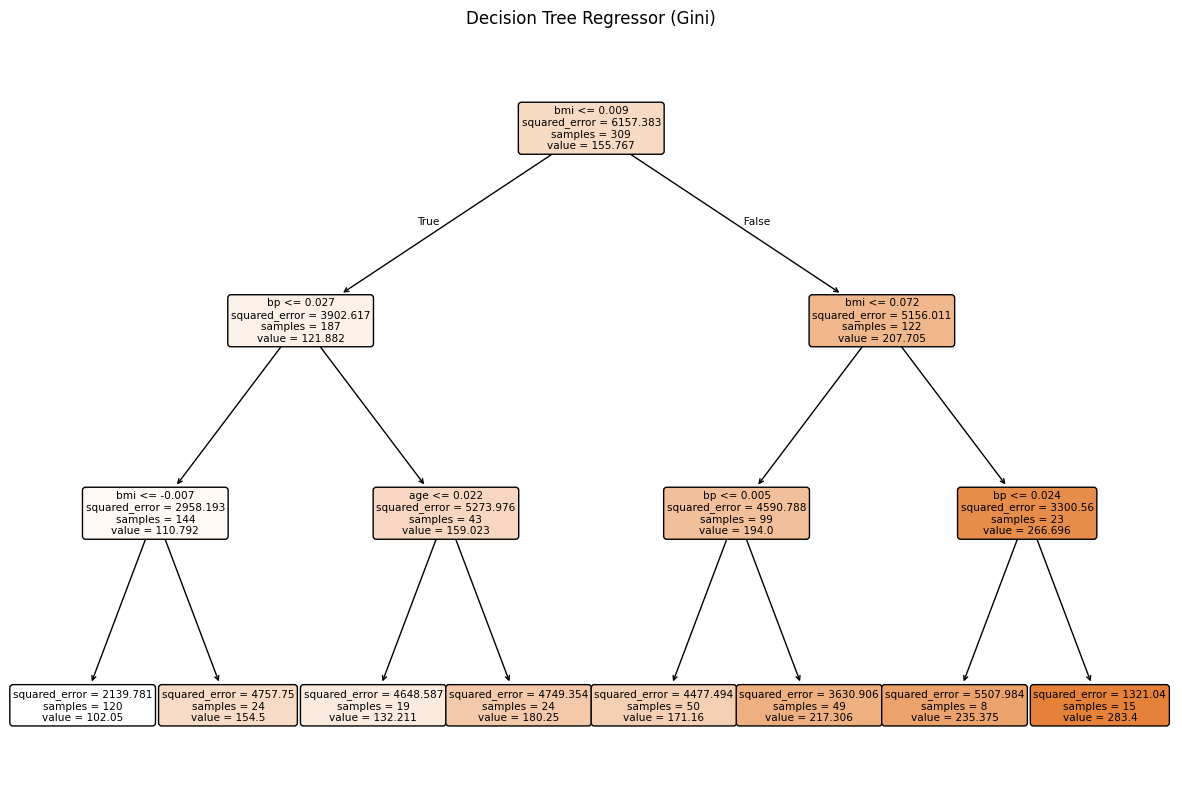

In [37]:
if __name__ == "__main__":
    # Use the already loaded diabetes_df
    data = diabetes_df
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data)

    # Train Decision Tree Regressors
    reg_gini = train_using_gini(X_train, X_test, y_train)

    # Visualizing the Decision Tree Regressor
    feature_names = ['age', 'sex', 'bmi', 'bp']

    from sklearn.tree import plot_tree # Ensure plot_tree is imported

    plt.figure(figsize=(15, 10)) # Set figure size for better visualization
    plot_tree(reg_gini, filled=True, feature_names=feature_names, rounded=True, impurity=True)
    plt.title("Decision Tree Regressor (Gini)")
    plt.show()